In [1]:
### FB prophet

### Prophet

Prophet is open source software released by Facebook's Core Data Science team. <br>
Prophet is a procedure for forecasting time series data based on an additive/multiplicative model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects.
It works best with time series that have strong seasonal effects and several seasons of historical data.
Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.<br>
The Prophet package provides intuitive parameters which are easy to tune.<br>
Prophet example notebooks<br>

Trend parameters<br>

`growth`: 'linear' or 'logistic' to specify a linear or logistic trend
`changepoints`: List of dates at which to include potential changepoints (automatic if not specified)
`n_changepoints`: If changepoints in not supplied, you may provide the number of changepoints to be automatically included
changepoint_prior_scale: Parameter for changing flexibility of automatic changepoint selection
Seasonality and Holiday Parameters <br>

`yearly_seasonality`: Fit yearly seasonality<br>
`weekly_seasonality`: Fit weekly seasonality<br>
`daily_seasonality`: Fit daily seasonality<br>
`holidays`: Feed dataframe containing holiday name and date<br>
`seasonality_prior_scale`: Parameter for changing strength of seasonality model<br>
`holiday_prior_scale`: Parameter for changing strength of holiday model<br>
Prophet requires the variable names in the time series to be:<br>

y – Target
ds – Datetime

In [2]:
###!mkdir ~/.kaggle

In [3]:
##!cp /kaggle.json ~/.kaggle/

In [4]:
##!chmod 600 ~/.kaggle/kaggle.json

In [5]:
###! pip install kaggle

In [6]:
###!pip install keras-tuner

In [7]:
###! kaggle datasets download -d bobnau/daily-website-visitors

In [8]:
###! unzip ./daily-website-visitors.zip

In [9]:
###! pip install tensorflow

In [10]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn import preprocessing
import matplotlib.pyplot as plt
tf.random.set_seed(123)
np.random.seed(123)

In [11]:


import pandas as pd
#import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np



In [12]:
df=pd.read_csv('/content/daily-website-visitors.csv', parse_dates=['Date'], index_col ="Date")
df.head(3)

,Row,Day,Day.Of.Week,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
Date,,,,,,,
2014-09-14,1,Sunday,1,"2,146","1,582","1,430",152
2014-09-15,2,Monday,2,"3,621","2,528","2,297",231
2014-09-16,3,Tuesday,3,"3,698","2,630","2,352",278


In [13]:
df.columns

Index(['Row', 'Day', 'Day.Of.Week', 'Page.Loads', 'Unique.Visits',
       'First.Time.Visits', 'Returning.Visits'],
      dtype='object')

In [14]:


df2 = df [['Page.Loads', 'Unique.Visits',
       'First.Time.Visits', 'Returning.Visits']]



In [15]:


df2['Page.Loads'] = df2['Page.Loads'].str.replace(',', '').astype(int)



<ipython-input-15-aee0d0387463>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Page.Loads'] = df2['Page.Loads'].str.replace(',', '').astype(int)


In [16]:
df2['Unique.Visits'] = df2['Unique.Visits'].str.replace(',', '').astype(int)
df2['First.Time.Visits'] = df2['First.Time.Visits'].str.replace(',', '').astype(int)
df2['Returning.Visits'] = df2['Returning.Visits'].str.replace(',', '').astype(int)

<ipython-input-16-55fee8d7339e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Unique.Visits'] = df2['Unique.Visits'].str.replace(',', '').astype(int)
<ipython-input-16-55fee8d7339e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['First.Time.Visits'] = df2['First.Time.Visits'].str.replace(',', '').astype(int)
<ipython-input-16-55fee8d7339e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [17]:
df2.head(3)

,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
Date,,,,
2014-09-14,2146,1582,1430,152
2014-09-15,3621,2528,2297,231
2014-09-16,3698,2630,2352,278


In [18]:


# Basic packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as rd # generating random numbers
import datetime # manipulating date formats
# Viz
import matplotlib.pyplot as plt # basic plotting
import seaborn as sns # for prettier plots
# TIME SERIES
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
# settings
import warnings
warnings.filterwarnings("ignore")



In [19]:
monthly_page_loads = df2["Page.Loads"].resample('M').sum()

In [20]:
monthly_unique_visitors = df2["Unique.Visits"].resample('M').sum()

In [21]:
monthly_First_Time_Visits = df2["First.Time.Visits"].resample('M').sum()

In [22]:
monthly_Returning_Visits = df2["Returning.Visits"].resample('M').sum()

In [23]:
monthly_page_loads.head(3)

Date
2014-09-30     56052
2014-10-31    121983
2014-11-30    114190
Freq: M, Name: Page.Loads, dtype: int64

In [24]:
print(monthly_page_loads.shape)
train=monthly_page_loads.iloc[:-30]
test=monthly_page_loads.iloc[-30:]
print(train.shape,test.shape)
### print(test.iloc[0],test.iloc[-1])

(72,)
(42,) (30,)


In [25]:
train = pd.DataFrame(train)

In [26]:
train.rename(columns={'Page.Loads':'Page_Loads'}, inplace=True)

In [27]:
test = pd.DataFrame(test)

In [28]:
test.rename(columns={'Page.Loads':'Page_Loads'}, inplace=True)

In [29]:

train_prophet = pd.DataFrame()
train_prophet['ds'] = train.index
train_prophet['y'] = train.Page_Loads.values

In [30]:
train_prophet.head()


,ds,y
0,2014-09-30,56052
1,2014-10-31,121983
2,2014-11-30,114190
3,2014-12-31,105617
4,2015-01-31,96077


In [ ]:
###!pip install pystan~=2.14
###!pip install fbprophet

In [36]:
import fbprophet

In [37]:
from fbprophet import Prophet

#instantiate Prophet with only yearly seasonality as our data is monthly 
model = Prophet( yearly_seasonality=True, seasonality_mode = 'multiplicative')
model.fit(train_prophet) #fit the model with your dataframe

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [38]:

# predict for five months in the furure and MS - month start is the frequency
future = model.make_future_dataframe(periods = 36, freq = 'MS') 
future.tail()

,ds
73,2020-10-01
74,2020-11-01
75,2020-12-01
76,2021-01-01
77,2021-02-01


In [39]:

# now lets make the forecasts
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
73,2020-10-01,97434.375753,76491.764352,118166.606330
74,2020-11-01,114107.861797,92885.451948,135082.306734
75,2020-12-01,120773.764779,100271.858879,141803.037628
76,2021-01-01,97546.960429,75950.113460,118983.411930
77,2021-02-01,100127.162651,79735.831315,121414.051636


In [65]:
test['ds'] = test.index
test['y'] = test.Page_Loads.values

In [66]:

# now lets make the forecasts
forecast2 = model.predict(test)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
25,2020-04-30,132094.928421,112250.570344,152282.880455
26,2020-05-31,126856.466242,106874.802045,146326.122026
27,2020-06-30,100250.201287,78320.808982,120274.633194
28,2020-07-31,81298.076991,59912.562638,101403.303763
29,2020-08-31,86509.035044,66147.033092,106508.391891


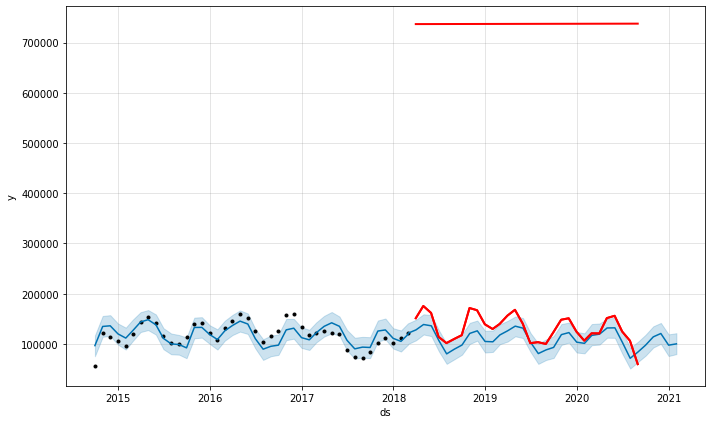

In [68]:
fig = model.plot(forecast)
#plot the predictions for validation set

plt.plot(test, label='Test', color = 'red', linewidth = 2)

plt.show()


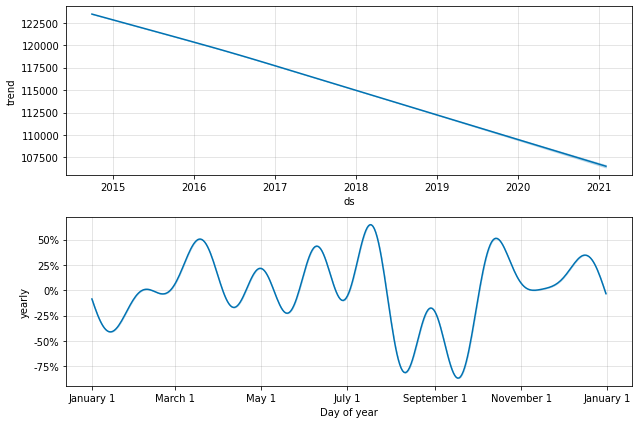

In [69]:

model.plot_components(forecast);

In [70]:
test.columns

Index(['Page_Loads', 'ds', 'y'], dtype='object')

In [71]:

y_prophet = pd.DataFrame()
y_prophet['ds'] = test.index
y_prophet['y'] = test["Page_Loads"].values


In [72]:
y_prophet = y_prophet.set_index('ds')
forecast_prophet = forecast.set_index('ds')

In [73]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error, mean_absolute_percentage_error

In [74]:

def evaluate_forecast(y,pred):
    results = pd.DataFrame({'r2_score':r2_score(y, pred),
                           }, index=[0])
    results['mean_absolute_error'] = mean_absolute_error(y, pred)
    results['median_absolute_error'] = median_absolute_error(y, pred)
    results['mse'] = mean_squared_error(y, pred)
    results['msle'] = mean_squared_log_error(y, pred)
    results['mape'] = mean_absolute_percentage_error(y, pred)
    results['rmse'] = np.sqrt(results['mse'])
    return results


In [75]:
forecast_prophet.columns

Index(['trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yhat'],
      dtype='object')

In [76]:
y_prophet.columns

Index(['y'], dtype='object')

In [77]:

start_index = test.index.min()
end_index = test.index.max()

In [79]:
print(y_prophet.shape, forecast2.shape)

(30, 1) (30, 16)


In [61]:
y_prophet.head(3)

,y
ds,
2018-03-31,151204
2018-04-30,175572
2018-05-31,161708


In [82]:
#y_prophet = y_prophet.set_index('ds')
forecast_prophet2 = forecast2.set_index('ds')

In [83]:
evaluate_forecast(y_prophet.y[start_index:end_index], forecast_prophet2.yhat_lower[start_index:end_index])

,r2_score,mean_absolute_error,median_absolute_error,mse,msle,mape,rmse
0,-1.67438,41298.766001,44951.959059,1.893995e+09,0.153678,0.308813,43520.054896


#### Improving Time Series Forecast models <br>
Hyperparamter Optimization: Finding the optimal parameters of ARIMA/Prophet models. <br>

Exogenous variables (SARIMAX): Including external variables like campaigns, holidays, events, natural calamities etc. <br>

Combining models for advanced time series predictions <br>

Long Short Term Memory Network (LSTM) <br>